<a href="https://colab.research.google.com/github/jdunaq/Data-Science-Portfolio/blob/main/Jess_Dunsmore_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The correlation of mosquito prevalence with cricket chirping rate
(NOTE: Run notebook in order from top to bottom)

###Load in and display data frames

          Date  Mosquito_Count_Indicator  Rain(mm)  Mean_T(DegC)  Min_T(DegC)  \
0       5/1/16                     254.4       0.0          18.8         12.2   
1       5/2/16                     273.5      16.5          21.1         16.5   
2       5/3/16                     304.0      27.0          12.9          8.9   
3       5/4/16                     256.2       0.0          15.7         10.2   
4       5/5/16                     243.8       7.5          18.9         10.2   
...        ...                       ...       ...           ...          ...   
1337  12/27/19                       5.5       0.0          -1.7         -4.6   
1338  12/28/19                       5.5       0.0           1.1         -3.6   
1339  12/29/19                       5.5       1.4           3.8          1.1   
1340  12/30/19                       5.5       0.4           2.7         -5.7   
1341  12/31/19                       5.5       0.0          -7.9        -10.9   

      Max_T(DegC)  
0      

Text(0, 0.5, 'Cricket chirps (Chirps/Minute)')

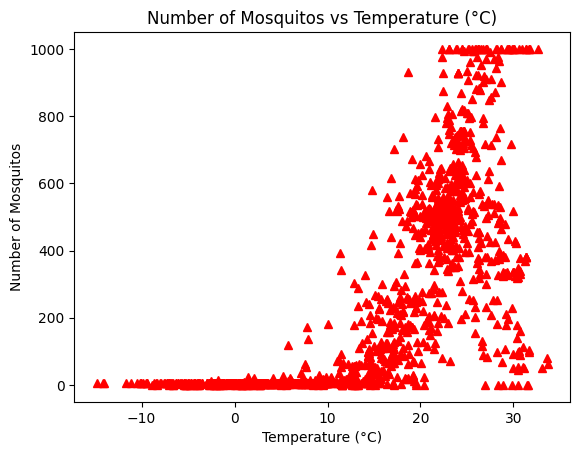

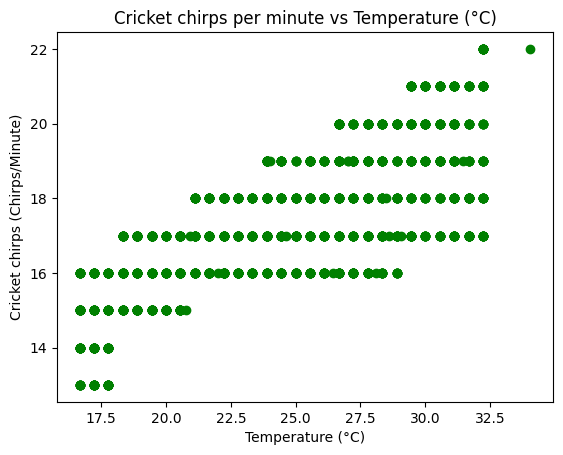

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Define linear regression model
regr = linear_model.LinearRegression()

# Read CSV files into data frames
df_m = pd.read_csv("mosquito.csv")
df_c = pd.read_csv("cricket.csv")

# Printing data frames for review
print(df_m)
print(df_c)

# Convert temperature values to Celsius for cricket data
df_c['Temp_DegC'] = 5/9*(df_c.Temp_DegF-32)

df_c = df_c.sort_values(by='Temp_DegC', ascending=True)
df_m = df_m.sort_values(by='Mean_T(DegC)',ascending=True)

print("Maximum and minimum values for cricket data:")
print("Max = ",df_c['Temp_DegC'].max(),"\N{DEGREE SIGN}C")
print("Min = ",df_c['Temp_DegC'].min(),"\N{DEGREE SIGN}C")

print("Maximum and minimum values for mosquito data:")
print("Max = ",df_m['Mean_T(DegC)'].max(),"\N{DEGREE SIGN}C")
print("Min = ",df_m['Mean_T(DegC)'].min(),"\N{DEGREE SIGN}C")

# Plotting data for review
plt.figure()
plt.plot(df_m['Mean_T(DegC)'],df_m.Mosquito_Count_Indicator,'r^')
plt.title('Number of Mosquitos vs Temperature (\N{DEGREE SIGN}C)')
plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
plt.ylabel('Number of Mosquitos')

plt.figure()
plt.plot(df_c.Temp_DegC,df_c['Chirps / Minute'],'go')
plt.title('Cricket chirps per minute vs Temperature (\N{DEGREE SIGN}C)')
plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
plt.ylabel('Cricket chirps (Chirps/Minute)')


Notice above, that there is a range of cricket chirp values that can exist at a single temperature. For the purposes of these analyses, the average value is going to be selected as the representative value. From observation, the deviation in cricket chirps rarely exceeds two for a given temperature which suggests that this approach is acceptable.

           Chirps / Minute  Temp_DegC
Temp_DegF                            
62.000000        14.673469  16.666667
63.000000        14.480000  17.222222
64.000000        14.423077  17.777778
65.000000        15.979592  18.333333
66.000000        16.070175  18.888889
67.000000        16.109091  19.444444
68.000000        15.800000  20.000000
69.000000        16.122449  20.555556
69.400002        15.000000  20.777779
69.699997        17.000000  20.944443
70.000000        16.891892  21.111111
71.000000        16.766667  21.666667
71.599998        16.000000  21.999999
72.000000        17.000000  22.222222
73.000000        16.918367  22.777778
74.000000        16.901961  23.333333
75.000000        17.575758  23.888889
75.199997        19.000000  23.999998
76.000000        17.408163  24.444444
76.300003        17.000000  24.611113
77.000000        17.000000  25.000000
78.000000        17.720000  25.555556
79.000000        17.365854  26.111111
79.599998        16.000000  26.444444
80.000000   

Text(0, 0.5, 'Cricket chirps (Chirps/Minute)')

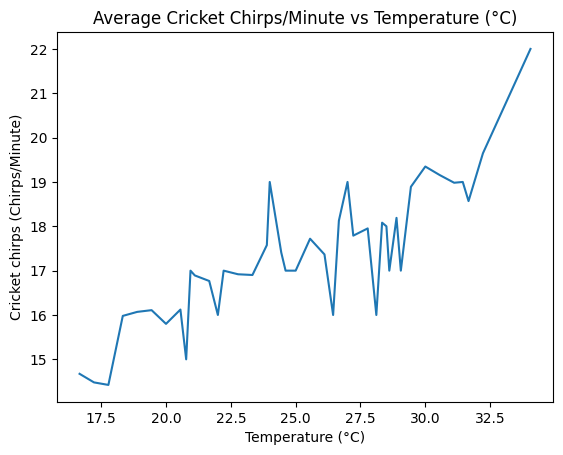

In [ ]:
# Restrict to average values
df_c = df_c.groupby('Temp_DegF').mean()
print(df_c)

plt.plot(df_c.Temp_DegC,df_c['Chirps / Minute'])
plt.title('Average Cricket Chirps/Minute vs Temperature (\N{DEGREE SIGN}C)')
plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
plt.ylabel('Cricket chirps (Chirps/Minute)')





###Perform linear regression on cricket data

LinearRegression()
R² =  0.7090171971171317


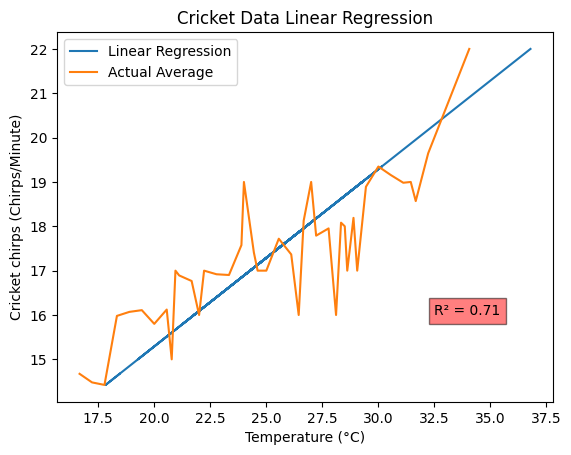

In [ ]:
# Reshape values for the purpose of linear regression
X_c = df_c['Chirps / Minute'].values.reshape(-1,1)
Y_c = df_c.Temp_DegC.values.reshape(-1,1)

# Perform linear regression
creg = regr.fit(X_c,Y_c)

# Calculate slope and y-intercept obtained from fitted line
Slope_c = creg.coef_[0]
Intercept_c = creg.intercept_

# Define predicted values
df_c['TPred_C'] = Slope_c*df_c['Chirps / Minute'] + Intercept_c

# Check the r^2 value
cr2 = creg.score(X_c,Y_c)
print("R\N{SUPERSCRIPT TWO} = ", cr2)

# Plot of regression results
plt.plot(df_c.TPred_C,df_c['Chirps / Minute'])
plt.plot(df_c.Temp_DegC,df_c['Chirps / Minute'])
plt.xlabel("Temperature (\N{DEGREE SIGN}C)")
plt.ylabel("Cricket chirps (Chirps/Minute)")
plt.title("Cricket Data Linear Regression")
plt.text(32.5, 16, 'R\N{SUPERSCRIPT TWO} = %.2f'%cr2, fontsize = 10, bbox = dict(facecolor = 'red', alpha = 0.5))
plt.legend(['Linear Regression','Actual Average'],loc='upper left')



###Perform linear regression on mosquito data

LinearRegression()
R²(mosquito count) = 0.53
R²(chirp rate) = 0.71


(0.0, 1200.0)

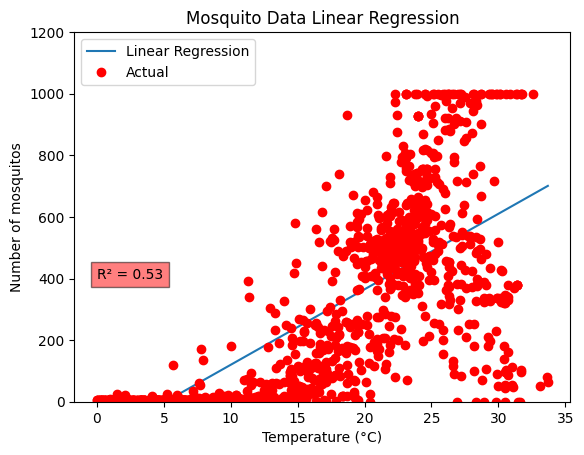

In [ ]:
# Narrowing eligible data range
boolish = df_m['Mean_T(DegC)'].between(0,df_m['Mean_T(DegC)'].max())
df_m = df_m[boolish]

# Performing second round of linear regression on mosquito related data

# Reshape values for the purpose of linear regression
X_m = df_m['Mean_T(DegC)'].values.reshape(-1,1)
Y_m = df_m.Mosquito_Count_Indicator.values.reshape(-1,1)

# Perform linear regression
mreg = regr.fit(X_m,Y_m)

# Calculate slope and y-intercept obtained from fitted line
Slope_m = mreg.coef_[0]
Intercept_m = mreg.intercept_
df_mp = Slope_m*df_m['Mean_T(DegC)']+Intercept_m

# Check the r^2 values
mr2 = mreg.score(X_m,Y_m)
print('R\N{SUPERSCRIPT TWO}(mosquito count) = %.2f'%mr2)
print('R\N{SUPERSCRIPT TWO}(chirp rate) = %.2f'%cr2)

plt.plot(df_m['Mean_T(DegC)'],df_mp)
plt.plot(df_m['Mean_T(DegC)'],df_m.Mosquito_Count_Indicator,'ro')
plt.title('Mosquito Data Linear Regression')
plt.legend(['Linear Regression', 'Actual'],loc='upper left')
plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
plt.ylabel('Number of mosquitos')
plt.text(0, 400, 'R\N{SUPERSCRIPT TWO} = %.2f'%mr2, fontsize = 10, bbox = dict(facecolor = 'red', alpha = 0.5))
plt.ylim((0,1200))



Note that in this instance, the domain of the data has been restricted to positive temperatures at which the number of mosquitos present begins to increase. It can be seen further above, that temperatures beneath this range generally have a decreased presence of mosquitos. The lower R^2 value may be due to the variability introduced by the dependence of the number of mosquitos on the quantity of rain experienced. It should be noted that there is a high quantity of outliers in the obtained plot. Moreover, the data appear to follow more of an exponential trend.

###Request user input to obtain number of mosquitos from cricket chirp rate

In [ ]:
# Request user input
user_chirps = float(input('Please input a value for chirps/minute between 14/minute and 22/minute: \n'))

# Raise exception if negative chirps used as input
if user_chirps<0:
  raise Exception("Chirps / Minute but be greater than or equal to zero!")
elif user_chirps<14 or user_chirps>22:
  raise Exception("Chirps / Minute must be a value between 14 and 22!")

# Calculate temperature
itemp = Slope_c*user_chirps + Intercept_c

# Estimate number of mosquitos present
Mosquito_Est = Slope_m*itemp + Intercept_m

# Number of mosquitos cannot be less than 0
if Mosquito_Est<0:
  Mosquito_Est[0] = 0

print("The number of mosquitos present is approximately:", round(Mosquito_Est[0]))

# Check if r^2 values are greater than 0.5 (deemed acceptable)
if mr2<0.5 or cr2<0.5:
  print("The estimate made from the linear regression is a poor estimate")
else:
  print("The estimate made from the linear regression is an acceptable estimate")

Please input a value for chirps/minute between 14/minute and 22/minute: 
15
The number of mosquitos present is approximately: 347
The estimate made from the linear regression is an acceptable estimate


The above estimate is assumed to be a acceptable estimate as the R^2 values obtained are greater than 0.5 for each linear regression. However,
the volume of rain fallen was not taken into account, and numerous outliers are present. Multiple estimates should instead be provided and based upon different ranges of the volume of rain experienced. This will be conducted in the following section.

###Taking rain into account

Please input a value for chirps / minute: 
18
The mosquito estimate when rainfall is 0 mm (mm) = 574  and R² = 0.67
The mosquito estimate when rainfall is 0-5 mm (mm) = 658  and R² = 0.71
The mosquito estimate when rainfall is 5-15 mm (mm) = 724  and R² = 0.76
The mosquito estimate when rainfall is >15 mm (mm) = 758  and R² = 0.60


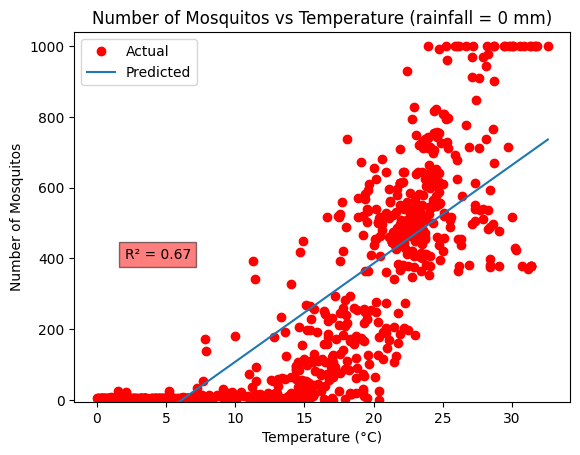

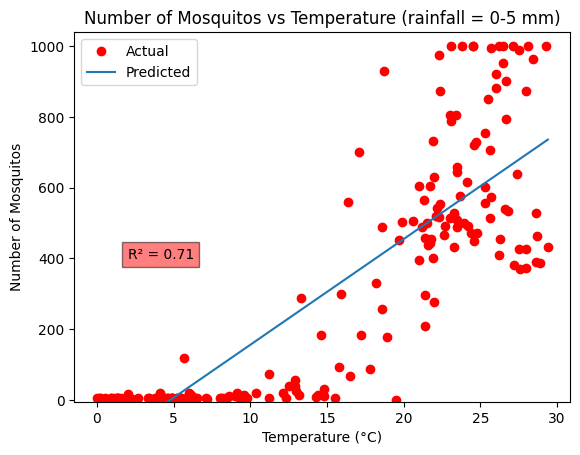

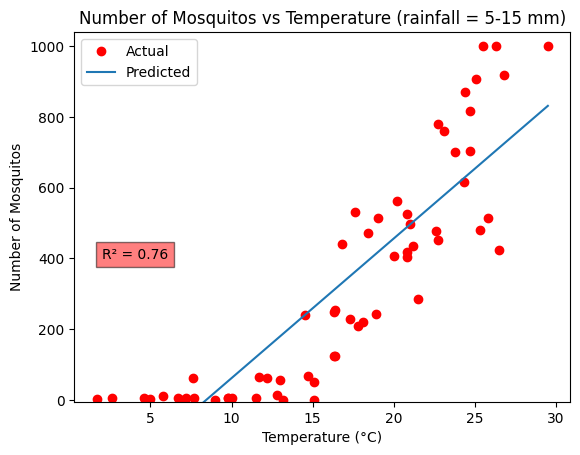

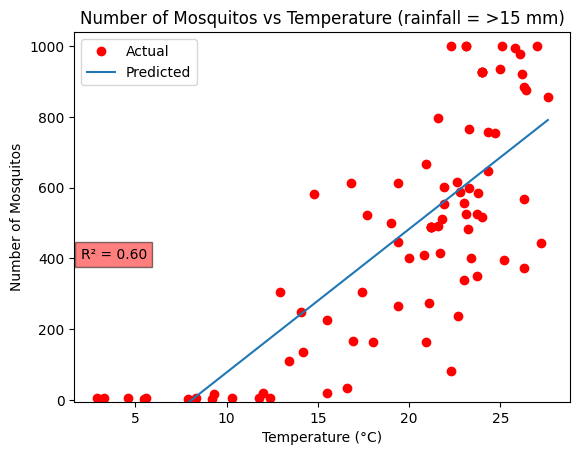

In [ ]:
# Request user input
user_chirps = float(input('Please input a value for chirps / minute: \n'))

# Raise exception if negative chirps used as input
if user_chirps<0:
  raise Exception("Chirps / Minute must be greater than or equal to zero!")

# Calculate temperature from chirps
itemp = Slope_c*user_chirps + Intercept_c

# Split mosquito data into multiple ranges dependent upon the quantity of rain
df_marray=[df_m[df_m['Rain(mm)']==0],df_m[df_m['Rain(mm)'].between(0,5,inclusive='neither')],df_m[df_m['Rain(mm)'].between(5,15)],df_m[df_m['Rain(mm)']>15]]

# Initialise regression input arrays
rainfall = ['0 mm','0-5 mm','5-15 mm','>15 mm']

#Initialise regression output arrays
Slopes_m = [0] * len(df_marray)
Intercepts_m = [0] * len(df_marray)
Mosq_Est = [0] * len(df_marray)

i = 0 # Counter

# For each data frame in the list
for df in df_marray:

  #Remove outliers (overestime mosquitos and assume mosquito count will be high on warm days)
  df = df.drop(df[(df.Mosquito_Count_Indicator<350) & (df['Mean_T(DegC)']>23)].index)

  # Reshape values for the purpose of linear regression
  X_mr = df['Mean_T(DegC)'].values.reshape(-1,1)
  Y_mr = df.Mosquito_Count_Indicator.values.reshape(-1,1)

  # Perform linear regression
  mreg = regr.fit(X_mr,Y_mr)
  mscore = mreg.score(X_mr,Y_mr)

  # Calculate slope and y-intercept obtained from fitted line and estimate number of mosquitos
  Slopes_m[i] = mreg.coef_[0]
  Intercepts_m[i] = mreg.intercept_
  Mosq_Est[i] = Slopes_m[i]*itemp + Intercepts_m[i]

  # Cannot have less than 0 mosquitos
  if Mosq_Est[i]<0:
    Mosq_Est[i]=0

  # Plotting mosquito quantity against temperature for each rainfall range
  plt.figure()
  plt.plot(df['Mean_T(DegC)'],df.Mosquito_Count_Indicator,'ro')
  plt.plot(df['Mean_T(DegC)'],Slopes_m[i]*df['Mean_T(DegC)']+Intercepts_m[i])
  plt.legend(['Actual','Predicted'])
  plt.title('Number of Mosquitos vs Temperature (rainfall = %s)'%rainfall[i])
  plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
  plt.ylabel('Number of Mosquitos')
  plt.text(2, 400, 'R\N{SUPERSCRIPT TWO} = %.2f'%mscore, fontsize = 10, bbox = dict(facecolor = 'red', alpha = 0.5))
  plt.ylim((-5,df.Mosquito_Count_Indicator.max()+40))

  print('The mosquito estimate when rainfall is', rainfall[i], '(mm) =', round(Mosq_Est[i][0]),' and R\N{SUPERSCRIPT TWO} = %.2f'%mscore)

  # Move to next array element
  i += 1


It appears that the number of mosquitos present usually increases accordingly with the volume of rain that has fallen. It should be noted that these results are an overestimate due to the exclusion of data that demonstrated the possibility of lower mosquito counts on warmer days.